# SCC0275: Introdução a Ciência de Dados - 2o Semestre de 2021
# SCC0275 - Exercício 5

### Profa. Roseli A. F. Romero

### Monitor: Kenzo Sakiyama

Nro do grupo:

Alunos:


1.  Stefan Taiguara Couperus Leal -  10414866


---


## Objetivos da prática:
- Entender modelagem de dados;
- Entender o processo de avaliação;
- Trabalhar com procedimentos de amostragem;
- Trabalhar com várias medidas de avaliação.


---

**Escolha, entre as opções abaixo, apenas UM dataset para realizar os exercícios.**

**Se o dataset escolhido tiver mais de duas classes, transforme ele num problema binário. Isso pode ser feito escolhendo uma classe para representar a classe positiva e o restante a classe negativa.**

**Possíveis datasets:**


*   **Câncer de mama:** [sklearn.datasets.load_breast_cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)
*   **Dígitos:** [sklearn.datasets.load_digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits)
*   **Wine:** [sklearn.datasets.load_wine](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine)


---


Após a análise dos dados e um pré-processamento vem a etapa de modelagem dos experimentos. Essa etapa pode requerer voltar no pré-processamento caso perceba-se que algo precisa ser feito. A modelagem visa determinar as etapas da execução dos experimentos. No nosso cenário, experimento é a utilização de algoritmos de classificação, regressão ou agrupamento. Para tanto, é preciso definir, com ajuda da análise dos dados, o tipo do problema (classificação, regressão, ...), os atributos/features a serem utilizados e o processo de avaliação.

Essa prática foca mais no processo de avaliação.
Para a avaliação é preciso definir qual a função de custo/erro adequada, e qual o estimador para o desempenho.

Utilizaremos medidas de desempenho para classificação binária baseadas na matriz de confusão (TFP, TFN, TVP, TVN).

Nas aplicações reais, o cliente dita qual a medida de desempenho deve ser utilizada, e muitas vezes não é uma das clássicas. E como essa medida, em geral, tem um impacto grande no treinamento do algoritmo de classificação, muitas vezes o algoritmo precisa ser adaptado e isso não é uma tarefa fácil.

Após a definição do tipo do problema e da medida de avaliação, é preciso definir como será estimado o desempenho final.

Esse processo está ligado á escolha do algoritmo de classificação bem como a escolha de alguns hiperparâmetros. Uma abordagem muito comum na área é a utilização do 10-fold Cross-Validation. Esse procedimento pode ser utilizado para estimar o desempenho do classificador final, bem como, na escolha de alguns poucos hiperparâmetros.

---


### Questão 01.

- Caso a base escolhida tenha mais de 2 classes, transforme-a em um problema binário definindo uma classe como positiva e a outra como negativa. Você pode fazer isso uma vez e depois usar a nova base nas próximas questões.

- Outras operações como remoção de atributos podem ser feitas uma vez fora da função de pré-processamento.

- Implemente a função de pré-processamento para sua base aplicando as técnicas que achar necessário.


In [1]:
# Transforme sua base em binária, isso pode ser feito apenas uma vez antes dos outros experimentos.
# usando o Iris como exemplo, mas a resolução seria similar para as outras base
import time 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from math import floor

cancer = load_breast_cancer()

x_treino, x_teste, y_treino, y_teste = train_test_split(cancer.data, cancer.target,test_size = 0.3,random_state = 0, stratify = cancer.target)

In [2]:
def preprocess(x_treino, x_teste, y_treino, y_teste):
    
    
    sc = StandardScaler()
    x_treino_novo = sc.fit_transform(x_treino)
    x_teste_novo = sc.transform(x_teste)

    y_treino_novo = y_treino 
    y_teste_novo = y_teste
    
    return x_treino_novo, x_teste_novo, y_treino_novo, y_teste_novo

preprocess(x_treino, x_teste, y_treino, y_teste)

(array([[-0.24995442, -0.41944853, -0.30789852, ..., -0.97718897,
         -0.20739477, -0.66832181],
        [-0.79719889,  3.42031225, -0.8426786 , ..., -1.27347868,
          0.02906671, -0.60716144],
        [ 0.12040295,  1.95051371,  0.19721609, ...,  0.85203866,
          2.175283  ,  2.81725844],
        ...,
        [-0.84142066, -0.99846008, -0.81461668, ..., -0.1069885 ,
          0.6694832 ,  0.38767659],
        [-0.58438159,  1.32930699, -0.56927529, ...,  0.08421472,
         -0.48326649, -0.07747892],
        [-0.47382716, -0.40772765, -0.44780725, ..., -0.24941232,
         -0.1220059 ,  1.56599573]]),
 array([[ 0.82242363,  1.85909083,  0.77729613, ...,  0.61566933,
          0.19163397,  0.3764545 ],
        [-0.36880044,  0.76201632, -0.40451172, ..., -0.32062422,
         -0.10558497, -0.18072213],
        [ 0.04025098,  0.68700268,  0.18478867, ...,  0.96194288,
         -0.08095356,  1.64455034],
        ...,
        [-0.30523164,  0.36585053, -0.33275337, ..., -

### Questão 02.

- Implemente uma função que gere uma matriz de confusão a partir de predições.
- Escolha uma métrica dentre as apresentadas durante a aula e implemente-a a partir da matriz confusão.

In [3]:
# Caso de teste. 
# Você pode usar a matriz de confusão do scikit para comparar com a saida da sua.
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix as cm
import matplotlib.pyplot as plt

actual    = np.array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1])
predicted = np.array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [4]:
# mudar o nome e parâmetros de acordo com sua métrica
def accuracy(conf_mat):
    return (sum(np.diagonal(conf_mat))) / (conf_mat.sum())

def precision(conf_mat):
    return conf_mat[0][0] / (conf_mat[0][0] + conf_mat[1][1])

def false_positive_rate(conf_mat):
    return conf_mat[0][1] / (conf_mat[0][1] + conf_mat[1][1]) 

def true_positive_rate(conf_mat):
    return conf_mat[0][0] / (conf_mat[0][0] + conf_mat[1][0])

def positive_predictive_value(conf_mat):
    return conf_mat[0][0] / (conf_mat[0][0] + conf_mat[0][1])

def negative_predictive_value(conf_mat):
    return conf_mat[0][1] / (conf_mat[0][0] + conf_mat[0][1])

def all_functions(conf_mat):
    data =  {
            "accuracy": [], 
            "precision": [], 
            "false_positive_rate": [], 
            "true_positive_rate": [], 
            "positive_predictive_value": [], 
            "negative_predictive_value": [],
           }

    data["accuracy"] = accuracy(conf_mat)
    data["precision"] =  precision(conf_mat)
    data["false_positive_rate"] =  false_positive_rate(conf_mat)
    data["true_positive_rate"] =  true_positive_rate(conf_mat)
    data["positive_predictive_value"] =  positive_predictive_value(conf_mat)
    data["negative_predictive_value"] =  negative_predictive_value(conf_mat)
    
    return data


def print_all_the_information(results):
    results = results["results"]
    print("---------Percepetron------------")
    print("Accuracy: {:.2f}%".format(100*np.mean(results['perceptron']["all_functions"][0]["accuracy"])))
    print("Precision: {:.2f}%".format(100*np.mean(results['perceptron']["all_functions"][0]['precision'])))
    print("False Positive Rate: {:.2f}%".format(100*np.mean(results['perceptron']["all_functions"][0]['false_positive_rate'])))
    print("True Positive Rate: {:.2f}%".format(100*np.mean(results['perceptron']["all_functions"][0]['true_positive_rate'])))
    print("Positive Predictive Value: {:.2f}%".format(100*np.mean(results['perceptron']["all_functions"][0]['positive_predictive_value'])))
    print("Negative Predictive Value: {:.2f}%".format(100*np.mean(results['perceptron']["all_functions"][0]['negative_predictive_value'])))


    print("\n\n---------Decision Tree------------")
    print("Accuracy: {:.2f}%".format(100*np.mean(results['dt']["all_functions"][0]["accuracy"])))
    print("Precision: {:.2f}%".format(100*np.mean(results['dt']["all_functions"][0]['precision'])))
    print("False Positive Rate: {:.2f}%".format(100*np.mean(results['dt']["all_functions"][0]['false_positive_rate'])))
    print("True Positive Rate: {:.2f}%".format(100*np.mean(results['dt']["all_functions"][0]['true_positive_rate'])))
    print("Positive Predictive Value: {:.2f}%".format(100*np.mean(results['dt']["all_functions"][0]['positive_predictive_value'])))
    print("Negative Predictive Value: {:.2f}%".format(100*np.mean(results['dt']["all_functions"][0]['negative_predictive_value'])))


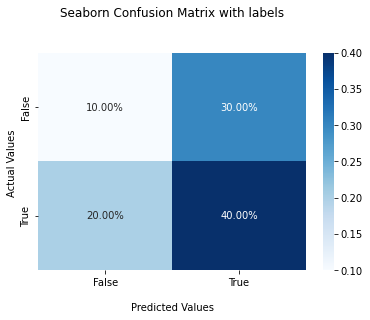

Acurácia: 50.00%
Precision: 20.00%
False Positive Rate: 42.86%
True Positive Rate: 33.33%
Positive Predictive Value: 25.00%
Negative Predictive Value: 75.00%


In [5]:
def confusion_matrix(y_test, y_pred):
    conf = cm(y_test, y_pred)
    
    ax = sns.heatmap(conf/np.sum(conf), annot=True, 
            fmt='.2%', cmap='Blues')

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()
    
    print("Acurácia: {:.2f}%".format(accuracy(conf)*100))
    print("Precision: {:.2f}%".format(precision(conf)*100))
    print("False Positive Rate: {:.2f}%".format(false_positive_rate(conf)*100))
    print("True Positive Rate: {:.2f}%".format(true_positive_rate(conf)*100))
    print("Positive Predictive Value: {:.2f}%".format(positive_predictive_value(conf)*100))
    print("Negative Predictive Value: {:.2f}%".format(negative_predictive_value(conf)*100))
    
    
    return conf

conf_mat = confusion_matrix(actual, predicted)

Uma boa prática é escolher modelos mais simples, dados dois modelos com desempenho similar a escolha do mais simples é indicada pois com isso há algumas garantias de melhor generalização. Generalização, de maneira geral, é a propriedade que garante que o classificador terá desempenho parecido ao reportado no conjunto de teste.

A definição da complexidade de um modelo nem sempre é uma tarefa fácil. Uma maneira de tentar mensurar isso é através do número de parâmetros do modelo, do tipo de função que ele implementa (linear ou não linear, cortes ortogonais no espaço, ...).

### Questão 03.

Complete e execute a função *classificacao* definida no notebook.

- Aplique validação cruzada
- Use sua função de pré-processamento
- Use sua métrica de avaliação
- Diga qual o modelo tem o melhor desempenho e explique porque você acha isso.

**Sugestão**: Utilize o gabarito do exercício anterior como referência.

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt
from numpy import mean, std
import numpy as np
from sklearn.metrics import accuracy_score


def classificacao(data, columns, target, preproc_fn, score_fn, score_name,
                  folds=5, plot=True):
    """
    Executa classificação do conjunto de dados passado
    ---------------------------------------------------------------
    data:       DataFrame. Conjunto de dados
    columns:    Lista de inteiros. Índice das colunas utilizadas no treinamento e teste
    target:     Inteiro. Índice da coluna alvo
    preproc_fn: Função. Faz o pré-processamento da base já separada em treino e teste 
    score_fn:   Função. A função que calcula a medida de desempenho desejada. Deve ser uma 
                função que compara dois vetores, o primeiro vetor são os valores preditos
                pelo classificador, o segundo os rótulos reais
                Vide exemplo das funções em 
                http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
                como por exemplo, sklearn.metrics.accuracy_score
                http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    score_name: String. Uma string com o nome da medida de desempenho
    folds:      Inteiro. Número de folds na validação cruzada
    plot:       Booleano. True para plotar os gráficos False para não plotar
    ---------------------------------------------------------------
    Realiza a classificação em 2 modelos (perceptron, Árvore de decisão)
    Plot o gráfico de desempenho para cada classificador.
    Retorna um dicionário com os classificadores treinados, as medidas de desempenho e matriz de confusão
    """
    
    start = time.time()
    
    # inicializa os modelos com os parâmetros solicitados
    prcp = Perceptron()
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=int(len(data)*0.1))
    
    clfs = [prcp, dt]
    clfs_names = ['perceptron', 'dt']
  
    # prepara validação cruzada
    # faz divisão do dataset em fold partes
    kf = KFold(n_splits=folds)
    
    
    results = {'perceptron':  
                   {
                    score_name: [],
                    "value": []
                   },
               'dt':
                   {
                    score_name: [],
                    "value": []
                   },
              }
    
    for train_index, test_index in kf.split(data):     


        # itera para cada classificador fazendo treino e teste
        for c, c_name in zip(clfs, clfs_names):
            # para cada split 

                # separa conjunto de treino e de teste
                x_treino, x_teste, y_treino, y_teste = train_test_split(
                                                        data[train_index],
                                                        target[train_index],
                                                        test_size = 0.3,
                                                        random_state = 42)


                x_train, x_test, y_train, y_test = preproc_fn(x_treino, x_teste, y_treino, y_teste)


                # faz o treino do modelo
                clf = c.fit(X=x_train, y=y_train)

                # valores preditos pelo classificador
                y_pred = clf.predict(x_test)
                # rótulos verdadeiros convertidos para array
                y_test = np.array(y_test)
                conf = cm(y_test, y_pred)
            
                results[c_name][score_name].append(score_fn(conf))
                
                resultado = accuracy_score( y_test, y_pred)
                results[c_name]["value"].append(resultado)
                
    if not plot:
        return {'results': results, 'clfs':clfs}
    
    
    # faz o plot de desempenho dos classificadores
    plt.figure(figsize=(8,8))
    plt.grid()
    plt.bar(range(1, len(clfs)+1), [mean(results[name]["value"]) for name in clfs_names], 
                                yerr=[std(results[name]["value"]) for name in clfs_names])
    plt.xticks(range(1, len(clfs)+1), clfs_names, rotation=45)
    title = 'Desempenho dos classificadores - %s'%(score_name)
    plt.title(title)
    plt.show()
    
    print("It took {:.2f} seconds".format(time.time() - start))
    
    return {'results': results, 'clfs':clfs}




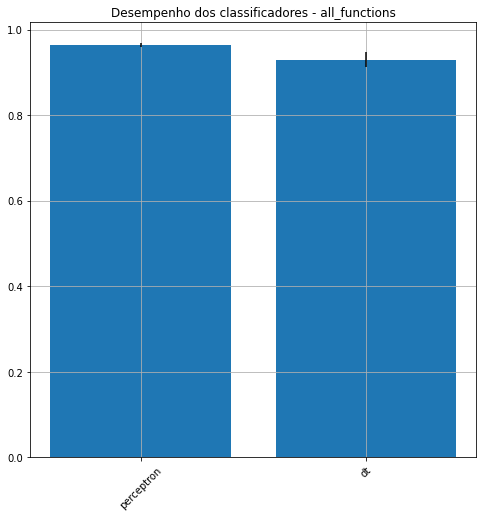

It took 0.41 seconds
---------Percepetron------------
Accuracy: 95.62%
Precision: 25.19%
False Positive Rate: 2.97%
True Positive Rate: 91.67%
Positive Predictive Value: 91.67%
Negative Predictive Value: 8.33%


---------Decision Tree------------
Accuracy: 94.89%
Precision: 22.31%
False Positive Rate: 6.48%
True Positive Rate: 100.00%
Positive Predictive Value: 80.56%
Negative Predictive Value: 19.44%


In [7]:
# Chama a função com suas métricas

results = classificacao(cancer.data, cancer.data, cancer.target, preprocess, all_functions, "all_functions",
                  folds=5, plot=True)

print_all_the_information(results)
# results

---

### Questão 04.

Utilizar os 2 procedimentos de amostragem para estimação do desempenho:
- 10-fold Cross Validation;
- Leave-one-out;

Para o dataset escolhido, executar os 2 procedimentos acima para estimar o desempenho. Avalie a diferença na variância entre essas abordagens.

  * Você pode utilizar a função *classificacao* já disponível apenas ajustando o parâmetro *folds*.

Essas execuções podem demorar um pouco, então tenham paciência.

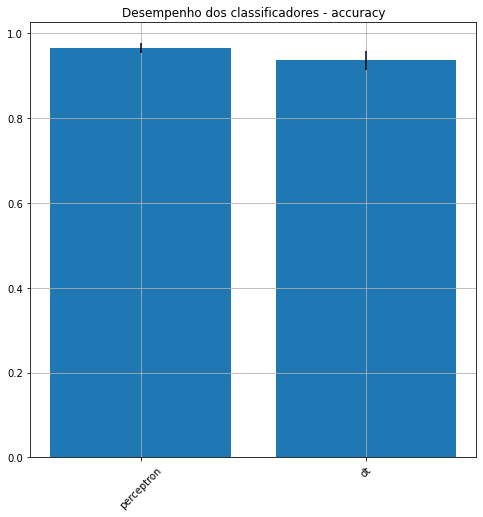

It took 0.43 seconds


In [8]:
# Chama a função com 10-fold cross validation
results =  classificacao(cancer.data, cancer.data, cancer.target, preprocess, accuracy, "accuracy",
                  folds=10, plot=True)

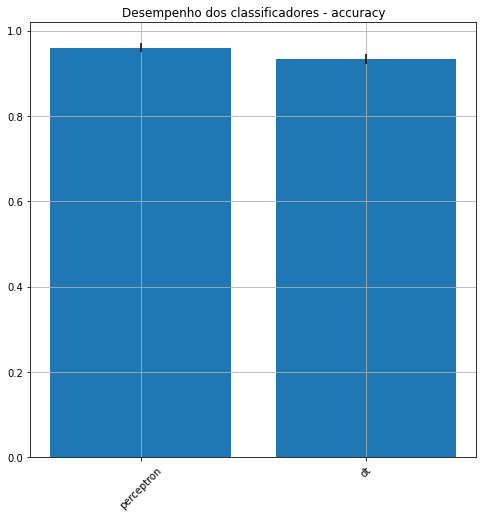

It took 11.04 seconds


In [9]:
# Chama a função com leave-one-out
# Chama a função com 10-fold cross validation
results = classificacao(cancer.data, cancer.data, cancer.target, preprocess, accuracy, "accuracy",
                  folds=len(cancer.data), plot=True)